# Assignment 6

How to model throwing a die with data science? Is that a perfectly random event, or not? What is the histogram that matches the experiment? Build a model (i.e. its histogram)

Importing all the library needed for the program

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

Define function for equal probability of dies when thrown

In [66]:
def uniform_die():
    return np.full((6), 1/6)

Define function for randomly getting numbers and p is to indentified which type of operation is to be performed

In [67]:
def throw_die(p_func):
    return np.random.choice(range(1, 7), p = p_func)

Ploting of histogram and returning the probability value

In [68]:
def get_prob_hist(samples, title, times):
    cnts, bins = np.histogram(samples, bins= times)
    bins = bins[:-1] + (bins[1] - bins[0])/2
    probs = cnts/float(cnts.sum())
    
    plt.title(title, fontsize=12)
    plt.xlabel("Die roll outcome")
    plt.ylabel("Probability")
    plt.bar(bins, probs)
    plt.show()
    return probs

It will stored the number came on die and return the list 

In [69]:
def die_outcomes(trials, p_func):
    outcomes = []
    for i in range(trials):
        outcomes.append(throw_die(p_func()))
    return outcomes

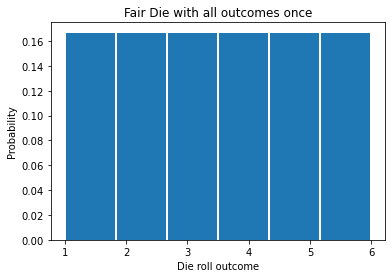

In [70]:
title = "Fair Die with all outcomes once"
samples = [1,2,3,4,5,6]
probs = get_prob_hist(samples, title, 6)

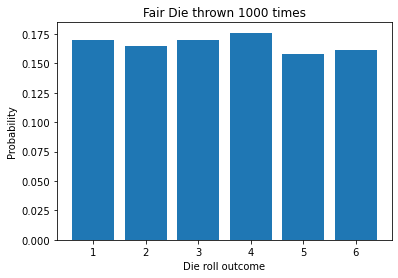

In [71]:
title = "Fair Die thrown 1000 times"
samples = die_outcomes(1000, uniform_die)
probs = get_prob_hist(samples, title, 1000)

Define function that will produce probability list of randomly weighted die then it will return the list

In [102]:
def p_weighted_die():
    weight = np.random.rand(6)
    number = np.array(range(1,7))
    prob_norm = weight * number / (weight * number).sum()
    return prob_norm

(0.0, 1.0)

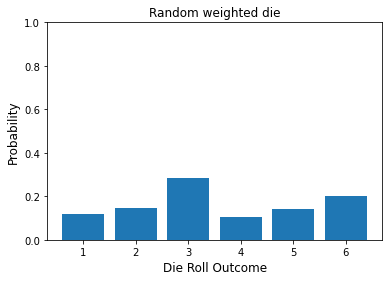

In [103]:
samples = range(1,7)
p_rand = p_weighted_die()
plt.bar(samples, p_rand)
plt.title('Random weighted die', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Die Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

Defined the function that will produce weighted die that matches the Gaussian distribution. **diff** is used to keep the sum value less then or equal to 1. 

In [104]:
def p_norm():
    samples = np.array(range(1,7))
    mean = np.mean(samples)
    pdf_val = stats.norm.pdf(samples, mean)
    diff = 1 - pdf_val.sum()
    pdf_val[0] = pdf_val[0] + (diff / 2)
    pdf_val[5] = pdf_val[5] + (diff / 2)
    return pdf_val

(0.0, 1.0)

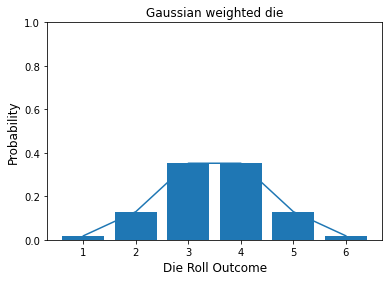

In [105]:
p = p_norm()
plt.plot(samples, p)
plt.bar(samples, p)
plt.title('Gaussian weighted die', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Die Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

build a generative model allowing you to actually roll your gaussian-loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.

Build generative model that will generate nth number of trials and return the outcome in the form of list

In [106]:
def generative_model(n_trials):
    actual_outcomes = []
    for i in range(n_trials):
        actual_outcomes.append(np.random.choice(range(1, 7), p=p_norm()))
    return actual_outcomes

Outcome when the die is thrown with same probability

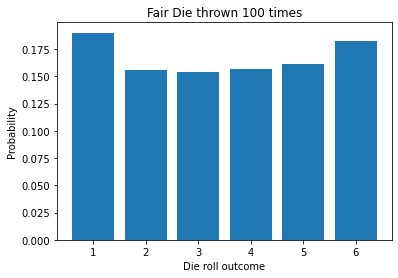

In [109]:
title = "Fair Die thrown 100 times"
samples = die_outcomes(1000, uniform_die)
probs = get_prob_hist(samples, title, 1000)

Outcome when the die is thrown with weighted die probability

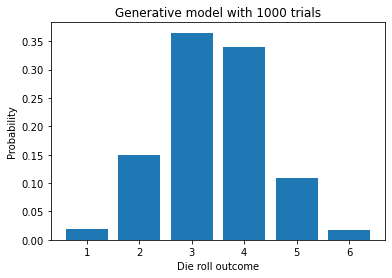

In [110]:
n_trials = 1000
samples = generative_model(n_trials)
title = "Generative model with "+ str(n_trials) +" trials"
probs = get_prob_hist(samples, title, n_trials)

Calculating the mean and standard deviation for thr given samples and probs stores the list of probabilty of the outcome from generative model

In [111]:
mean, var = np.mean(samples), np.var(samples)
probs = list(filter(lambda x: x > 0, probs))

Define the function for the calculation of gaussian distribution

<div style="font-size: 110%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

The **expectation** (or first moment), and the **standard deviation** (or second moment) of a gaussian are:
$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

Using **method of moments**,for the normal distribution, the mean and variance turn out to be (analytically derived):

<br />
<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} =\mu $$
$$ \hat{\sigma}^2 = S^2 = \sigma^2 $$
</div>

In [112]:
def normpdf(x, mean, var):
    denom = (2 * math.pi * var) ** 0.5
    num = math.exp(- (float(x) - float(mean)) ** 2 / (2 * var))
    return num/denom

Calculating gaussian distribution for each number and appending in the list

In [97]:
theoretical = []
for i in range(1, 7):
    theoretical.append(normpdf(i, mean, var))
theoretical

[0.02835091357667158,
 0.14412421252543517,
 0.32495400356619236,
 0.32495400356619236,
 0.14412421252543517,
 0.02835091357667158]

Calculating Error by taking the difference between theoretical and generator value and then divided by generator value.

In [98]:
error = []
for i,n in enumerate(theoretical):
    error.append(abs(n - probs[i]) / probs[i])
error

[0.05496954744428062,
 0.0992236717160302,
 0.08318001188730792,
 0.015290898284265615,
 0.039171916497098835,
 0.05496954744428062]